In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
#from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
from sklearn.feature_selection import mutual_info_classif

In [2]:
def get_rect_array(lat_arr, lon_arr):
    latrect = []
    for i in range(len(lat_arr)):
        if(lat_arr[i] not in latrect):
            latrect.append(lat_arr[i])
    latrect.sort()
    latrect = np.array(latrect)

    lonrect = []
    for i in range(len(lon_arr)):
        if(lon_arr[i] not in lonrect):
            lonrect.append(lon_arr[i])
    lonrect.sort()
    lonrect = np.array(lonrect)

    return [latrect, lonrect]

def extract_data(latrect, lonrect, grid_data, l):
    for i in range(len(grid_data)):
        diff_arr_x = np.absolute(lonrect - grid_data[i,0])
        id_x = diff_arr_x.argmin()

        diff_arr_y = np.absolute(latrect - grid_data[i,1])
        id_y = diff_arr_y.argmin()

        l[id_y, id_x] = grid_data[i,2]
    return l

basin_name = 'Brahmaputra'
input_path = 'C:\\Users\\Dell\\Ver_0_hari1\\code\\Processed_data\\'
x_val = pd.read_csv(input_path+basin_name+'\\'+basin_name+'_training.csv', header=None).to_numpy()

In [3]:
x_val = x_val[:,3:len(x_val[1,:])]
x_val = x_val.astype('float64')

In [4]:
y_val = pd.read_csv(input_path+basin_name+'\\'+basin_name+'_training.csv', header=None).to_numpy()
y_val = y_val[:,2].astype('int')
y_val = np.reshape(y_val, -1)

In [5]:
### SVC
svc_clf = make_pipeline(StandardScaler(), SVC(C=5, kernel = 'rbf', tol=0.001, max_iter=-1, random_state=5))
svc_fit = svc_clf.fit(x_val, y_val)

score = svc_fit.score(x_val, y_val)
params = svc_fit.get_params()

y_model_cal = svc_fit.predict(x_val)

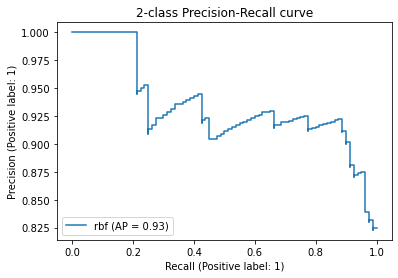

In [7]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    svc_fit, x_val, y_val, name="rbf")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [12]:
from sklearn.metrics import precision_score

precision_score(y_val, y_model_cal, average='weighted')


0.911457509099541

In [11]:
from sklearn.metrics import recall_score
recall_score(y_val, y_model_cal, average='weighted')

0.90625

In [13]:
x_valid = pd.read_csv(input_path+basin_name+'\\'+basin_name+'_validation.csv', header=None).to_numpy() ## Reading a csv file with all parameters in each row
x_valid = x_valid[:,3:len(x_valid[1,:])]
x_valid = x_valid.astype('float64')
# print(x_valid.shape)
y_valid = pd.read_csv(input_path+basin_name+'\\'+basin_name+'_validation.csv', header=None).to_numpy() ## Reading a csv file with all parameters in each row
y_valid = y_valid[:,2].astype('int')
y_valid = np.reshape(y_valid, -1)

y_model_val = svc_fit.predict(x_valid)

###### Calculate results
score = svc_fit.score(x_valid, y_valid)

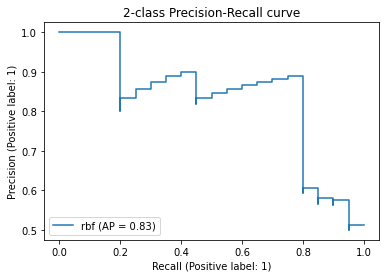

In [14]:
display = PrecisionRecallDisplay.from_estimator(
    svc_fit, x_valid, y_valid, name="rbf")
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [15]:
precision_score(y_valid, y_model_val, average='weighted')


0.7756892230576441

In [16]:
recall_score(y_valid, y_model_val, average='weighted')


0.775